In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import re
from datetime import date

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
tweet=pd.read_csv("C:/Users/krishna/Downloads/SBIN_Stock_tweet (1).csv",encoding = "ISO-8859-1")
tweet.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2021-10-24 12:00:05+00:00,1452243495914250243,#SBIN - SBIN - TradingView - https://t.co/Rtn...,in_tradingview
1,1,2021-10-24 11:52:48+00:00,1452241664332926986,Chart story ep #8\n\nðð\nhttps://t.co/7O...,HariHarWealth
2,2,2021-10-24 11:30:05+00:00,1452235944338378759,#SBIN - SBIN Long - TradingView - https://t.co...,in_tradingview
3,3,2021-10-24 11:29:09+00:00,1452235710820495361,SBIN Long - #SBIN chart on @TradingView https:...,KotadiaNitin
4,4,2021-10-24 09:01:54+00:00,1452198654710796293,#Sbi 502\n#TataMotors 490 (52 week High Is 530...,Darshanj101


In [3]:
tweet['timestamp'] = pd. to_datetime(tweet['Datetime'])

In [4]:
tweet['timestamp'] = pd. to_datetime(tweet['Datetime'])
tweet['date'] = tweet['timestamp']. dt. date
tweet.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,timestamp,date
0,0,2021-10-24 12:00:05+00:00,1452243495914250243,#SBIN - SBIN - TradingView - https://t.co/Rtn...,in_tradingview,2021-10-24 12:00:05+00:00,2021-10-24
1,1,2021-10-24 11:52:48+00:00,1452241664332926986,Chart story ep #8\n\nðð\nhttps://t.co/7O...,HariHarWealth,2021-10-24 11:52:48+00:00,2021-10-24
2,2,2021-10-24 11:30:05+00:00,1452235944338378759,#SBIN - SBIN Long - TradingView - https://t.co...,in_tradingview,2021-10-24 11:30:05+00:00,2021-10-24
3,3,2021-10-24 11:29:09+00:00,1452235710820495361,SBIN Long - #SBIN chart on @TradingView https:...,KotadiaNitin,2021-10-24 11:29:09+00:00,2021-10-24
4,4,2021-10-24 09:01:54+00:00,1452198654710796293,#Sbi 502\n#TataMotors 490 (52 week High Is 530...,Darshanj101,2021-10-24 09:01:54+00:00,2021-10-24


In [5]:
tweet=tweet.iloc[:,[6,3]]

In [6]:
tweet.head()

,date,Text
0,2021-10-24,#SBIN - SBIN - TradingView - https://t.co/Rtn...
1,2021-10-24,Chart story ep #8\n\nðð\nhttps://t.co/7O...
2,2021-10-24,#SBIN - SBIN Long - TradingView - https://t.co...
3,2021-10-24,SBIN Long - #SBIN chart on @TradingView https:...
4,2021-10-24,#Sbi 502\n#TataMotors 490 (52 week High Is 530...


In [7]:
#Create a function to remove special characters
def remove_special_characters(text):
    pat = r'[^a-zA-z0-9]' 
    return re.sub(pat, ' ', text)

In [8]:
 #lets apply this function
tweet['Text'] = tweet.apply(lambda x: remove_special_characters(x['Text']), axis = 1)

In [9]:
tweet['Text']

0         SBIN   SBIN    TradingView   https   t co Rtn...
1        Chart story ep  8           https   t co 7OxH7...
2         SBIN   SBIN Long   TradingView   https   t co...
3        SBIN Long    SBIN chart on  TradingView https ...
4         Sbi 502  TataMotors 490  52 week High Is 530 ...
                               ...                        
19996     SBIN  intraday   successful short trade in SB...
19997     SBIN   Bullish Shark   SBI  Positional    Tra...
19998     SBIN  sbi No solace for the bulls  moving sha...
19999     Bearish stocks chart   M_MFin   Unionbank   A...
20000     SBIN   SBIN   TradingView   https   t co dIem...
Name: Text, Length: 20001, dtype: object

In [10]:
tweet['no_punc'] = tweet['Text'].str.replace('[^\w\s]','')
tweet.head()

,date,Text,no_punc
0,2021-10-24,SBIN SBIN TradingView https t co Rtn...,SBIN SBIN TradingView https t co Rtn...
1,2021-10-24,Chart story ep 8 https t co 7OxH7...,Chart story ep 8 https t co 7OxH7...
2,2021-10-24,SBIN SBIN Long TradingView https t co...,SBIN SBIN Long TradingView https t co...
3,2021-10-24,SBIN Long SBIN chart on TradingView https ...,SBIN Long SBIN chart on TradingView https ...
4,2021-10-24,Sbi 502 TataMotors 490 52 week High Is 530 ...,Sbi 502 TataMotors 490 52 week High Is 530 ...


In [11]:
from nltk.tokenize import word_tokenize

In [12]:
tweet['tokenized'] = tweet['no_punc'].apply(word_tokenize)
tweet.head()

,date,Text,no_punc,tokenized
0,2021-10-24,SBIN SBIN TradingView https t co Rtn...,SBIN SBIN TradingView https t co Rtn...,"[SBIN, SBIN, TradingView, https, t, co, Rtns5L..."
1,2021-10-24,Chart story ep 8 https t co 7OxH7...,Chart story ep 8 https t co 7OxH7...,"[Chart, story, ep, 8, https, t, co, 7OxH7XVoqv..."
2,2021-10-24,SBIN SBIN Long TradingView https t co...,SBIN SBIN Long TradingView https t co...,"[SBIN, SBIN, Long, TradingView, https, t, co, ..."
3,2021-10-24,SBIN Long SBIN chart on TradingView https ...,SBIN Long SBIN chart on TradingView https ...,"[SBIN, Long, SBIN, chart, on, TradingView, htt..."
4,2021-10-24,Sbi 502 TataMotors 490 52 week High Is 530 ...,Sbi 502 TataMotors 490 52 week High Is 530 ...,"[Sbi, 502, TataMotors, 490, 52, week, High, Is..."


In [13]:
tweet['lower'] = tweet['tokenized'].apply(lambda x: [word.lower() for word in x])
tweet.head()

,date,Text,no_punc,tokenized,lower
0,2021-10-24,SBIN SBIN TradingView https t co Rtn...,SBIN SBIN TradingView https t co Rtn...,"[SBIN, SBIN, TradingView, https, t, co, Rtns5L...","[sbin, sbin, tradingview, https, t, co, rtns5l..."
1,2021-10-24,Chart story ep 8 https t co 7OxH7...,Chart story ep 8 https t co 7OxH7...,"[Chart, story, ep, 8, https, t, co, 7OxH7XVoqv...","[chart, story, ep, 8, https, t, co, 7oxh7xvoqv..."
2,2021-10-24,SBIN SBIN Long TradingView https t co...,SBIN SBIN Long TradingView https t co...,"[SBIN, SBIN, Long, TradingView, https, t, co, ...","[sbin, sbin, long, tradingview, https, t, co, ..."
3,2021-10-24,SBIN Long SBIN chart on TradingView https ...,SBIN Long SBIN chart on TradingView https ...,"[SBIN, Long, SBIN, chart, on, TradingView, htt...","[sbin, long, sbin, chart, on, tradingview, htt..."
4,2021-10-24,Sbi 502 TataMotors 490 52 week High Is 530 ...,Sbi 502 TataMotors 490 52 week High Is 530 ...,"[Sbi, 502, TataMotors, 490, 52, week, High, Is...","[sbi, 502, tatamotors, 490, 52, week, high, is..."


In [14]:
from nltk.corpus import stopwords, wordnet

In [15]:
stop = stopwords.words('english')

tweet['stopwords'] = tweet['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
tweet.head()

,date,Text,no_punc,tokenized,lower,stopwords
0,2021-10-24,SBIN SBIN TradingView https t co Rtn...,SBIN SBIN TradingView https t co Rtn...,"[SBIN, SBIN, TradingView, https, t, co, Rtns5L...","[sbin, sbin, tradingview, https, t, co, rtns5l...",1
1,2021-10-24,Chart story ep 8 https t co 7OxH7...,Chart story ep 8 https t co 7OxH7...,"[Chart, story, ep, 8, https, t, co, 7OxH7XVoqv...","[chart, story, ep, 8, https, t, co, 7oxh7xvoqv...",3
2,2021-10-24,SBIN SBIN Long TradingView https t co...,SBIN SBIN Long TradingView https t co...,"[SBIN, SBIN, Long, TradingView, https, t, co, ...","[sbin, sbin, long, tradingview, https, t, co, ...",1
3,2021-10-24,SBIN Long SBIN chart on TradingView https ...,SBIN Long SBIN chart on TradingView https ...,"[SBIN, Long, SBIN, chart, on, TradingView, htt...","[sbin, long, sbin, chart, on, tradingview, htt...",2
4,2021-10-24,Sbi 502 TataMotors 490 52 week High Is 530 ...,Sbi 502 TataMotors 490 52 week High Is 530 ...,"[Sbi, 502, TataMotors, 490, 52, week, High, Is...","[sbi, 502, tatamotors, 490, 52, week, high, is...",1


In [16]:
stop_words = set(stopwords.words('english'))
tweet['stopwords_removed'] = tweet['lower'].apply(lambda x: [word for word in x if word not in stop_words])
tweet.head()

,date,Text,no_punc,tokenized,lower,stopwords,stopwords_removed
0,2021-10-24,SBIN SBIN TradingView https t co Rtn...,SBIN SBIN TradingView https t co Rtn...,"[SBIN, SBIN, TradingView, https, t, co, Rtns5L...","[sbin, sbin, tradingview, https, t, co, rtns5l...",1,"[sbin, sbin, tradingview, https, co, rtns5l6sht]"
1,2021-10-24,Chart story ep 8 https t co 7OxH7...,Chart story ep 8 https t co 7OxH7...,"[Chart, story, ep, 8, https, t, co, 7OxH7XVoqv...","[chart, story, ep, 8, https, t, co, 7oxh7xvoqv...",3,"[chart, story, ep, 8, https, co, 7oxh7xvoqv, j..."
2,2021-10-24,SBIN SBIN Long TradingView https t co...,SBIN SBIN Long TradingView https t co...,"[SBIN, SBIN, Long, TradingView, https, t, co, ...","[sbin, sbin, long, tradingview, https, t, co, ...",1,"[sbin, sbin, long, tradingview, https, co, o8x..."
3,2021-10-24,SBIN Long SBIN chart on TradingView https ...,SBIN Long SBIN chart on TradingView https ...,"[SBIN, Long, SBIN, chart, on, TradingView, htt...","[sbin, long, sbin, chart, on, tradingview, htt...",2,"[sbin, long, sbin, chart, tradingview, https, ..."
4,2021-10-24,Sbi 502 TataMotors 490 52 week High Is 530 ...,Sbi 502 TataMotors 490 52 week High Is 530 ...,"[Sbi, 502, TataMotors, 490, 52, week, High, Is...","[sbi, 502, tatamotors, 490, 52, week, high, is...",1,"[sbi, 502, tatamotors, 490, 52, week, high, 53..."


In [17]:
# Joining the list into one string/text
tweet['stp_rem_str'] = [' '.join(map(str, l)) for l in tweet['stopwords_removed']]
text = ' '.join(tweet['stp_rem_str'])
text

'sbin sbin tradingview https co rtns5l6sht chart story ep 8 https co 7oxh7xvoqv join us free https co tiba7x45uz nifty banknifty rvnl ptc axisbank sbi dlf cleanscience ioc ongc bhel coalindia oilindia oil hdfcbank sbin tatapower reliance pfc equitasbnk ntpc rec maruti bel sbin sbin long tradingview https co o8xitkpdbj sbin long sbin chart tradingview https co 8r9cfw3jql sbi 502 tatamotors 490 52 week high 530 cross 531 first nifty nifty50 niftyfuture banknifty niftybank stocks stockstowatch sbin pandemic low sbin happened 169 225 361 https co wbgixgmweh way rush still waiting representative get touch tooslow sbicard sbin sbin cash monthly weekly ltp 502 95 good set prefer dips positional view forstudypurpose notraderecomendation https co b2l2onozv9 ankur991singh sbin bullish 508 dcb tataconsumer posted good results recently see good move fingers crossed reacts like stocks posted good results tanked donno sad sbin sbi statebankofindia fraud bankfraud dont sbi account https co hmj2u3cjot

In [18]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
tweet['stemmi']=tweet['stp_rem_str'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
tweet['stemmi']

0                 sbin sbin tradingview http co rtns5l6sht
1        chart stori ep 8 http co 7oxh7xvoqv join us fr...
2            sbin sbin long tradingview http co o8xitkpdbj
3        sbin long sbin chart tradingview http co 8r9cf...
4        sbi 502 tatamotor 490 52 week high 530 cross 5...
                               ...                        
19996    sbin intraday success short trade sbi 23jul201...
19997    sbin bullish shark sbi posit tradingview http ...
19998    sbin sbi solac bull move sharpli quick sell pu...
19999    bearish stock chart m_mfin unionbank ashokley ...
20000             sbin sbin tradingview http co diem3t0yv0
Name: stemmi, Length: 20001, dtype: object

In [19]:
from textblob import Word

In [20]:
tweet['lemma'] = tweet['stemmi'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
tweet['lemma']

0                 sbin sbin tradingview http co rtns5l6sht
1        chart stori ep 8 http co 7oxh7xvoqv join u fre...
2            sbin sbin long tradingview http co o8xitkpdbj
3        sbin long sbin chart tradingview http co 8r9cf...
4        sbi 502 tatamotor 490 52 week high 530 cross 5...
                               ...                        
19996    sbin intraday success short trade sbi 23jul201...
19997    sbin bullish shark sbi posit tradingview http ...
19998    sbin sbi solac bull move sharpli quick sell pu...
19999    bearish stock chart m_mfin unionbank ashokley ...
20000             sbin sbin tradingview http co diem3t0yv0
Name: lemma, Length: 20001, dtype: object

In [21]:
tweet

,date,Text,no_punc,tokenized,lower,stopwords,stopwords_removed,stp_rem_str,stemmi,lemma
0,2021-10-24,SBIN SBIN TradingView https t co Rtn...,SBIN SBIN TradingView https t co Rtn...,"[SBIN, SBIN, TradingView, https, t, co, Rtns5L...","[sbin, sbin, tradingview, https, t, co, rtns5l...",1,"[sbin, sbin, tradingview, https, co, rtns5l6sht]",sbin sbin tradingview https co rtns5l6sht,sbin sbin tradingview http co rtns5l6sht,sbin sbin tradingview http co rtns5l6sht
1,2021-10-24,Chart story ep 8 https t co 7OxH7...,Chart story ep 8 https t co 7OxH7...,"[Chart, story, ep, 8, https, t, co, 7OxH7XVoqv...","[chart, story, ep, 8, https, t, co, 7oxh7xvoqv...",3,"[chart, story, ep, 8, https, co, 7oxh7xvoqv, j...",chart story ep 8 https co 7oxh7xvoqv join us f...,chart stori ep 8 http co 7oxh7xvoqv join us fr...,chart stori ep 8 http co 7oxh7xvoqv join u fre...
2,2021-10-24,SBIN SBIN Long TradingView https t co...,SBIN SBIN Long TradingView https t co...,"[SBIN, SBIN, Long, TradingView, https, t, co, ...","[sbin, sbin, long, tradingview, https, t, co, ...",1,"[sbin, sbin, long, tradingview, https, co, o8x...",sbin sbin long tradingview https co o8xitkpdbj,sbin sbin long tradingview http co o8xitkpdbj,sbin sbin long tradingview http co o8xitkpdbj
3,2021-10-24,SBIN Long SBIN chart on TradingView https ...,SBIN Long SBIN chart on TradingView https ...,"[SBIN, Long, SBIN, chart, on, TradingView, htt...","[sbin, long, sbin, chart, on, tradingview, htt...",2,"[sbin, long, sbin, chart, tradingview, https, ...",sbin long sbin chart tradingview https co 8r9c...,sbin long sbin chart tradingview http co 8r9cf...,sbin long sbin chart tradingview http co 8r9cf...
4,2021-10-24,Sbi 502 TataMotors 490 52 week High Is 530 ...,Sbi 502 TataMotors 490 52 week High Is 530 ...,"[Sbi, 502, TataMotors, 490, 52, week, High, Is...","[sbi, 502, tatamotors, 490, 52, week, high, is...",1,"[sbi, 502, tatamotors, 490, 52, week, high, 53...",sbi 502 tatamotors 490 52 week high 530 cross ...,sbi 502 tatamotor 490 52 week high 530 cross 5...,sbi 502 tatamotor 490 52 week high 530 cross 5...
...,...,...,...,...,...,...,...,...,...,...
19996,2019-07-24,SBIN intraday successful short trade in SB...,SBIN intraday successful short trade in SB...,"[SBIN, intraday, successful, short, trade, in,...","[sbin, intraday, successful, short, trade, in,...",2,"[sbin, intraday, successful, short, trade, sbi...",sbin intraday successful short trade sbi 23jul...,sbin intraday success short trade sbi 23jul201...,sbin intraday success short trade sbi 23jul201...
19997,2019-07-23,SBIN Bullish Shark SBI Positional Tra...,SBIN Bullish Shark SBI Positional Tra...,"[SBIN, Bullish, Shark, SBI, Positional, Tradin...","[sbin, bullish, shark, sbi, positional, tradin...",1,"[sbin, bullish, shark, sbi, positional, tradin...",sbin bullish shark sbi positional tradingview ...,sbin bullish shark sbi posit tradingview http ...,sbin bullish shark sbi posit tradingview http ...
19998,2019-07-23,SBIN sbi No solace for the bulls moving sha...,SBIN sbi No solace for the bulls moving sha...,"[SBIN, sbi, No, solace, for, the, bulls, movin...","[sbin, sbi, no, solace, for, the, bulls, movin...",11,"[sbin, sbi, solace, bulls, moving, sharply, qu...",sbin sbi solace bulls moving sharply quick sel...,sbin sbi solac bull move sharpli quick sell pu...,sbin sbi solac bull move sharpli quick sell pu...
19999,2019-07-23,Bearish stocks chart M_MFin Unionbank A...,Bearish stocks chart M_MFin Unionbank A...,"[Bearish, stocks, chart, M_MFin, Unionbank, As...","[bearish, stocks, chart, m_mfin, unionbank, as...",1,"[bearish, stocks, chart, m_mfin, unionbank, as...",bearish stocks chart m_mfin unionbank ashokley...,bearish stock chart m_mfin unionbank ashokley ...,bearish stock chart m_mfin unionbank ashokley ...


In [22]:
def cleantext(tweet):

 
    tweet = re.sub(r"â€™", "", tweet) # Remove Mentions
    tweet = re.sub(r"#", "", tweet) # Remove Hashtags Symbol
    tweet = re.sub(r"\w*\d\w*", "", tweet) # Remove numbers
    tweet = re.sub(r"https?:\/\/\S+", "", tweet) # Remove The Hyper Link
    tweet = re.sub(r"______________", "", tweet) # Remove _____
    whitespace = re.compile(r"\s+")
    web_address = re.compile(r"(?i)http(s):\/\/[a-z0-9.~_\-\/]+")
    infy = re.compile(r"(?i)@INFY(?=\b)")
    user = re.compile(r"(?i)@[a-z0-9_]+")
    tweet = whitespace.sub(' ', tweet)
    tweet = web_address.sub('', tweet)
    tweet = infy.sub('infy', tweet)
    tweet = user.sub('', tweet)
    return tweet

In [23]:
tweet['cleaned'] = tweet['lemma'].apply(cleantext)

In [24]:
tweet['cleaned']

0                           sbin sbin tradingview http co 
1        chart stori ep http co join u free http co nif...
2                      sbin sbin long tradingview http co 
3                sbin long sbin chart tradingview http co 
4        sbi tatamotor week high cross first nifti nift...
                               ...                        
19996    sbin intraday success short trade sbi http co ...
19997    sbin bullish shark sbi posit tradingview http co 
19998    sbin sbi solac bull move sharpli quick sell pu...
19999    bearish stock chart m_mfin unionbank ashokley ...
20000                       sbin sbin tradingview http co 
Name: cleaned, Length: 20001, dtype: object

In [25]:
from textblob import TextBlob

In [26]:
tweet['senti_polar'] = tweet['lemma'].apply(lambda x: TextBlob(x).sentiment.polarity )

In [27]:
tweet[['Text','senti_polar']].head()

,Text,senti_polar
0,SBIN SBIN TradingView https t co Rtn...,0.000000
1,Chart story ep 8 https t co 7OxH7...,0.400000
2,SBIN SBIN Long TradingView https t co...,-0.050000
3,SBIN Long SBIN chart on TradingView https ...,-0.050000
4,Sbi 502 TataMotors 490 52 week High Is 530 ...,0.136667


In [28]:
tweet['senti_polar'].describe()

count    20001.000000
mean         0.058648
std          0.198550
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.031250
max          1.000000
Name: senti_polar, dtype: float64

In [29]:
# Sentiment score of the whole review
tweet[tweet['senti_polar']<0]

,date,Text,no_punc,tokenized,lower,stopwords,stopwords_removed,stp_rem_str,stemmi,lemma,cleaned,senti_polar
2,2021-10-24,SBIN SBIN Long TradingView https t co...,SBIN SBIN Long TradingView https t co...,"[SBIN, SBIN, Long, TradingView, https, t, co, ...","[sbin, sbin, long, tradingview, https, t, co, ...",1,"[sbin, sbin, long, tradingview, https, co, o8x...",sbin sbin long tradingview https co o8xitkpdbj,sbin sbin long tradingview http co o8xitkpdbj,sbin sbin long tradingview http co o8xitkpdbj,sbin sbin long tradingview http co,-0.050000
3,2021-10-24,SBIN Long SBIN chart on TradingView https ...,SBIN Long SBIN chart on TradingView https ...,"[SBIN, Long, SBIN, chart, on, TradingView, htt...","[sbin, long, sbin, chart, on, tradingview, htt...",2,"[sbin, long, sbin, chart, tradingview, https, ...",sbin long sbin chart tradingview https co 8r9c...,sbin long sbin chart tradingview http co 8r9cf...,sbin long sbin chart tradingview http co 8r9cf...,sbin long sbin chart tradingview http co,-0.050000
12,2021-10-22,SIP between 480 to 450 Long term target 700 ...,SIP between 480 to 450 Long term target 700 ...,"[SIP, between, 480, to, 450, Long, term, targe...","[sip, between, 480, to, 450, long, term, targe...",4,"[sip, 480, 450, long, term, target, 700, sbin,...",sip 480 450 long term target 700 sbin chart tr...,sip 480 450 long term target 700 sbin chart tr...,sip 480 450 long term target 700 sbin chart tr...,sip long term target sbin chart tradingview ht...,-0.050000
27,2021-10-22,sbin amp tatamotors Both fighting hard ...,sbin amp tatamotors Both fighting hard ...,"[sbin, amp, tatamotors, Both, fighting, hard, ...","[sbin, amp, tatamotors, both, fighting, hard, ...",3,"[sbin, amp, tatamotors, fighting, hard, 506, l...",sbin amp tatamotors fighting hard 506 like 1st...,sbin amp tatamotor fight hard 506 like 1st 529...,sbin amp tatamotor fight hard 506 like 1st 529...,sbin amp tatamotor fight hard like nse bullrun...,-0.291667
39,2021-10-22,SGXNIFTY 51 DowJones Fut 29 Stoc...,SGXNIFTY 51 DowJones Fut 29 Stoc...,"[SGXNIFTY, 51, DowJones, Fut, 29, StockMarketi...","[sgxnifty, 51, dowjones, fut, 29, stockmarketi...",9,"[sgxnifty, 51, dowjones, fut, 29, stockmarketi...",sgxnifty 51 dowjones fut 29 stockmarketindia n...,sgxnifti 51 dowjon fut 29 stockmarketindia nif...,sgxnifti 51 dowjon fut 29 stockmarketindia nif...,sgxnifti dowjon fut stockmarketindia nifti ope...,-0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...
19960,2019-07-26,STOCK TO WATCH FOR NEXT WEEK BUYING HDFC HD...,STOCK TO WATCH FOR NEXT WEEK BUYING HDFC HD...,"[STOCK, TO, WATCH, FOR, NEXT, WEEK, BUYING, HD...","[stock, to, watch, for, next, week, buying, hd...",5,"[stock, watch, next, week, buying, hdfc, hdfcb...",stock watch next week buying hdfc hdfcbank ici...,stock watch next week buy hdfc hdfcbank icicib...,stock watch next week buy hdfc hdfcbank icicib...,stock watch next week buy hdfc hdfcbank icicib...,-0.125000
19961,2019-07-26,SBIN showing signs of life Q1 results in Aug...,SBIN showing signs of life Q1 results in Aug...,"[SBIN, showing, signs, of, life, Q1, results, ...","[sbin, showing, signs, of, life, q1, results, ...",10,"[sbin, showing, signs, life, q1, results, augu...",sbin showing signs life q1 results august expe...,sbin show sign life q1 result august expect pr...,sbin show sign life q1 result august expect pr...,sbin show sign life result august expect provi...,-0.194444
19974,2019-07-25,ONCE BOOK AND EXIT LONG IN SBIN AT COST sbin,ONCE BOOK AND EXIT LONG IN SBIN AT COST sbin,"[ONCE, BOOK, AND, EXIT, LONG, IN, SBIN, AT, CO...","[once, book, and, exit, long, in, sbin, at, co...",0,"[book, exit, long, sbin, cost, sbin]",book exit long sbin cost sbin,book exit long sbin cost sbin,book exit long sbin cost sbin,book exit long sbin cost sbin,-0.050000
19983,2019-07-24,As markets are looking weak since past few day...,As markets are looking weak since past few day...,"[As, markets, are, looking, weak, since, past,...","[as, markets, are, looking

In [30]:
tweet[tweet['senti_polar']>0]

,date,Text,no_punc,tokenized,lower,stopwords,stopwords_removed,stp_rem_str,stemmi,lemma,cleaned,senti_polar
1,2021-10-24,Chart story ep 8 https t co 7OxH7...,Chart story ep 8 https t co 7OxH7...,"[Chart, story, ep, 8, https, t, co, 7OxH7XVoqv...","[chart, story, ep, 8, https, t, co, 7oxh7xvoqv...",3,"[chart, story, ep, 8, https, co, 7oxh7xvoqv, j...",chart story ep 8 https co 7oxh7xvoqv join us f...,chart stori ep 8 http co 7oxh7xvoqv join us fr...,chart stori ep 8 http co 7oxh7xvoqv join u fre...,chart stori ep http co join u free http co nif...,0.400000
4,2021-10-24,Sbi 502 TataMotors 490 52 week High Is 530 ...,Sbi 502 TataMotors 490 52 week High Is 530 ...,"[Sbi, 502, TataMotors, 490, 52, week, High, Is...","[sbi, 502, tatamotors, 490, 52, week, high, is...",1,"[sbi, 502, tatamotors, 490, 52, week, high, 53...",sbi 502 tatamotors 490 52 week high 530 cross ...,sbi 502 tatamotor 490 52 week high 530 cross 5...,sbi 502 tatamotor 490 52 week high 530 cross 5...,sbi tatamotor week high cross first nifti nift...,0.136667
7,2021-10-23,SBIN CASH MONTHLY WEEKLY LTP 502 95 Good se...,SBIN CASH MONTHLY WEEKLY LTP 502 95 Good se...,"[SBIN, CASH, MONTHLY, WEEKLY, LTP, 502, 95, Go...","[sbin, cash, monthly, weekly, ltp, 502, 95, go...",7,"[sbin, cash, monthly, weekly, ltp, 502, 95, go...",sbin cash monthly weekly ltp 502 95 good set p...,sbin cash monthli weekli ltp 502 95 good set p...,sbin cash monthli weekli ltp 502 95 good set p...,sbin cash monthli weekli ltp good set prefer d...,0.700000
8,2021-10-23,ankur991singh SBIN bullish above 508 DCB Ta...,ankur991singh SBIN bullish above 508 DCB Ta...,"[ankur991singh, SBIN, bullish, above, 508, DCB...","[ankur991singh, sbin, bullish, above, 508, dcb...",11,"[ankur991singh, sbin, bullish, 508, dcb, tatac...",ankur991singh sbin bullish 508 dcb tataconsume...,ankur991singh sbin bullish 508 dcb tataconsum ...,ankur991singh sbin bullish 508 dcb tataconsum ...,sbin bullish dcb tataconsum post good result ...,0.266667
13,2021-10-22,New Strong resistance zone for sbin is 510 a...,New Strong resistance zone for sbin is 510 a...,"[New, Strong, resistance, zone, for, sbin, is,...","[new, strong, resistance, zone, for, sbin, is,...",8,"[new, strong, resistance, zone, sbin, 510, amp...",new strong resistance zone sbin 510 amp 515 al...,new strong resist zone sbin 510 amp 515 almost...,new strong resist zone sbin 510 amp 515 almost...,new strong resist zone sbin amp almost crore c...,0.284848
...,...,...,...,...,...,...,...,...,...,...,...,...
19975,2019-07-25,Fresh Exit SBIN 338 9 25 07 19 1 25 00 PM SL ...,Fresh Exit SBIN 338 9 25 07 19 1 25 00 PM SL ...,"[Fresh, Exit, SBIN, 338, 9, 25, 07, 19, 1, 25,...","[fresh, exit, sbin, 338, 9, 25, 07, 19, 1, 25,...",4,"[fresh, exit, sbin, 338, 9, 25, 07, 19, 1, 25,...",fresh exit sbin 338 9 25 07 19 1 25 00 pm sl 0...,fresh exit sbin 338 9 25 07 19 1 25 00 pm sl 0...,fresh exit sbin 338 9 25 07 19 1 25 00 pm sl 0...,fresh exit sbin pm sl deishma nimblrta amibrok...,0.300000
19977,2019-07-25,SBI Clerk Mains Admit Card 2019 As per sched...,SBI Clerk Mains Admit Card 2019 As per sched...,"[SBI, Clerk, Mains, Admit, Card, 2019, As, per...","[sbi, clerk, mains, admit, card, 2019, as, per...",6,"[sbi, clerk, mains, admit, card, 2019, per, sc...",sbi clerk mains admit card 2019 per schedule s...,sbi clerk main admit card 2019 per schedul sbi...,sbi clerk main admit card 2019 per schedul sbi...,sbi clerk main admit card per schedul sbi sbi ...,0.166667
19982,2019-07-24,The initial brkout hs definitely failed leadin...,The initial brkout hs definitely failed leadin...,"[The, initial, brkout, hs, definitely, failed,...","[the, initial, brkout, hs, definitely, failed,...",17,"[initial, brkout, hs, definitely, failed, lead...",initial brkout hs definitely failed leading ex...,initi brkout hs definit fail lead exit current...,initi brkout h definit fail lead exit current ...,initi brkout h definit fail lead exit current ...,0.090000
19996,2019-07-24,SBIN intraday successfu

In [31]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [32]:
from datetime import date

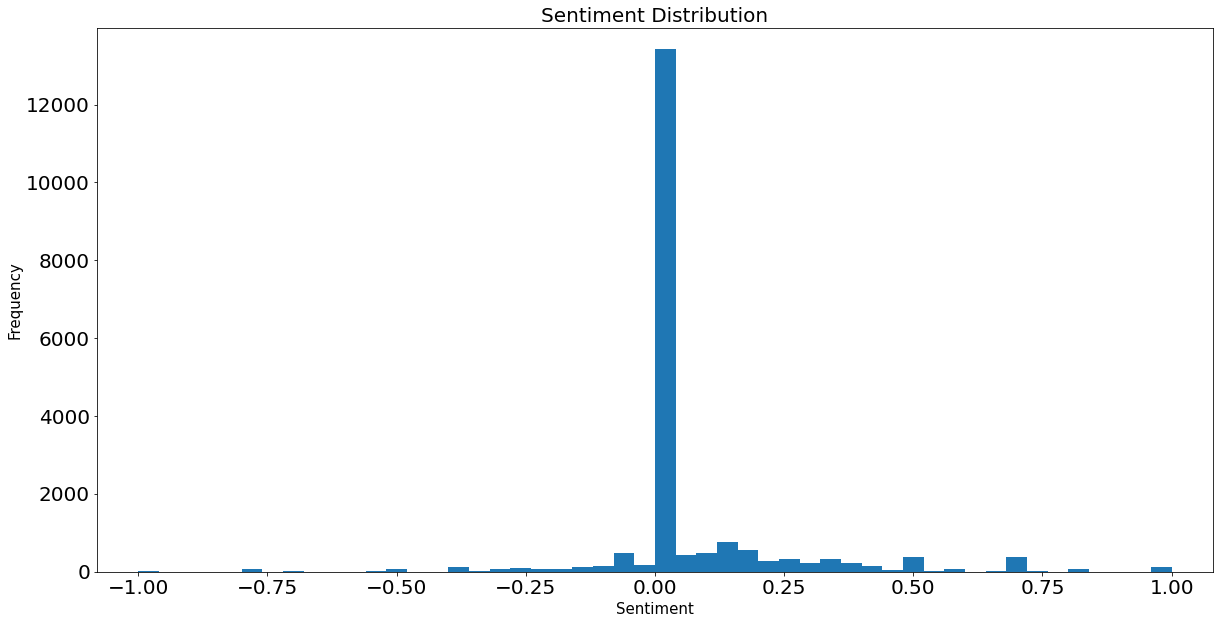

In [33]:
plt.figure(figsize=(20,10))
plt.margins(0.04)
plt.xlabel('Sentiment', fontsize=15)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=20)
plt.hist(tweet['senti_polar'], bins=50)
plt.title('Sentiment Distribution', fontsize=20)
plt.show()

<AxesSubplot:xlabel='date', ylabel='senti_polar'>

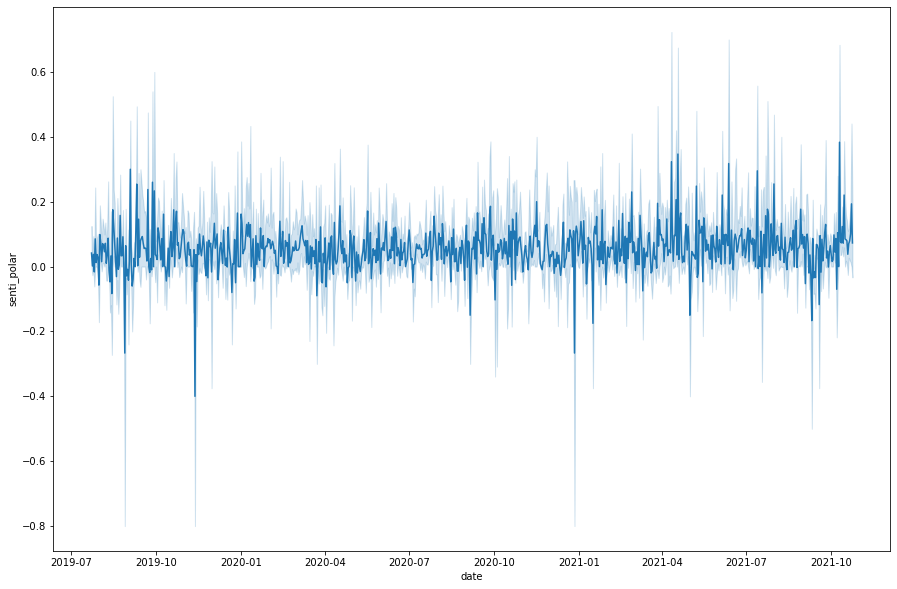

In [34]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.lineplot(y='senti_polar',x='date',data=tweet) 

In [35]:
tweet['sentiment'] = tweet['senti_polar'].apply(lambda x : 'Positive' if x > 0 else ('Negative' if x<0 else 'Neutral'))

In [36]:
tweet['sentiment']

0         Neutral
1        Positive
2        Negative
3        Negative
4        Positive
           ...   
19996    Positive
19997     Neutral
19998    Positive
19999     Neutral
20000     Neutral
Name: sentiment, Length: 20001, dtype: object

In [37]:
tweet_sent=tweet.to_csv("C:/Users/krishna/Downloads/SBIN_Stock_tweet.csv")
tweet_sent

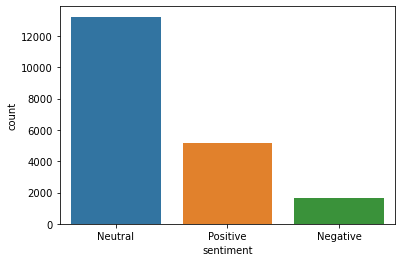

In [38]:
import seaborn as sns
sns.countplot(x='sentiment',data=tweet)
plt.show()

In [39]:
tweet['sentiment'] = tweet['sentiment'].replace({'Negative': -1})
tweet['sentiment'] = tweet['sentiment'].replace({'Positive': 1})
tweet['sentiment'] = tweet['sentiment'].replace({'Neutral': 0})

In [40]:
y=tweet['sentiment']
y

0        0
1        1
2       -1
3       -1
4        1
        ..
19996    1
19997    0
19998    1
19999    0
20000    0
Name: sentiment, Length: 20001, dtype: int64

In [41]:
corpus = tweet['cleaned'].tolist()
corpus[:10]

['sbin sbin tradingview http co ',
 'chart stori ep http co join u free http co nifti banknifti rvnl ptc axisbank sbi dlf cleanscienc ioc ongc bhel coalindia oilindia oil hdfcbank sbin tatapow relianc pfc equitasbnk ntpc rec maruti bel',
 'sbin sbin long tradingview http co ',
 'sbin long sbin chart tradingview http co ',
 'sbi tatamotor week high cross first nifti niftyfutur banknifti niftybank stock stockstowatch sbin',
 'pandem low sbin happen http co wbgixgmweh',
 'way rush still wait repres get touch tooslow sbicard sbin',
 'sbin cash monthli weekli ltp good set prefer dip posit view forstudypurpos notraderecomend http co ',
 ' sbin bullish dcb tataconsum post good result recent see good move finger cross react like stock post good result tank donno sad',
 'sbin sbi statebankofindia fraud bankfraud dont sbi account http co ']

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
df_tf_idf= vectorizer.fit_transform(corpus).toarray()

In [43]:
xtfidf = pd.DataFrame(df_tf_idf)
xtfidf

,0,1,2,3,4,5,6,7,8,9,...,14132,14133,14134,14135,14136,14137,14138,14139,14140,14141
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
ydf=pd.DataFrame(y)
ydf.value_counts()

sentiment
 0           13236
 1            5136
-1            1629
dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [46]:
x_traintfidf, x_testtfidf,y_traintfidf,y_testtfidf = train_test_split(xtfidf,ydf, test_size=0.33,random_state=0)
x_traintfidf.shape,y_traintfidf.shape, x_testtfidf.shape,y_testtfidf.shape

((13400, 14142), (13400, 1), (6601, 14142), (6601, 1))

In [47]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_traintfidf1, y_traintfidf1 = oversample.fit_resample(x_traintfidf, y_traintfidf)

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC

In [49]:
classifier2 = LogisticRegression(solver='lbfgs', max_iter=500, multi_class='multinomial')
classifier2.fit(x_traintfidf1, y_traintfidf1)
log_pred_test = classifier2.predict(x_testtfidf)
log_pred_train=classifier2.predict(x_traintfidf1)
acc_log_train2=accuracy_score(y_traintfidf1,log_pred_train)*100
acc_log_test2 = accuracy_score(y_testtfidf, log_pred_test) * 100
print('Accuracy of Training data =',acc_log_train2)
print("Accuracy of Test data =", acc_log_test2)

C:\Users\krishna\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of Training data = 99.31583669807088
Accuracy of Test data = 95.39463717618543


In [50]:
print(classification_report(y_testtfidf, log_pred_test))

              precision    recall  f1-score   support

          -1       0.87      0.82      0.85       551
           0       0.96      0.99      0.97      4320
           1       0.97      0.91      0.94      1730

    accuracy                           0.95      6601
   macro avg       0.93      0.91      0.92      6601
weighted avg       0.95      0.95      0.95      6601



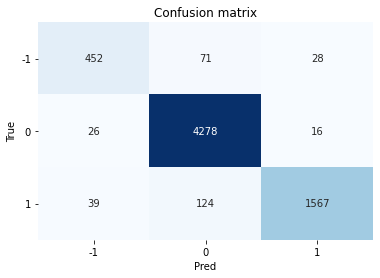

In [51]:
from sklearn import metrics
classes = np.unique(y_testtfidf)
cm0 = metrics.confusion_matrix(y_testtfidf, log_pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [52]:
model = LinearSVC()
model.fit(x_traintfidf1, y_traintfidf1)
pred_test = model.predict(x_testtfidf)
pred_train=model.predict(x_traintfidf1)
acc_train6=accuracy_score(y_traintfidf1,pred_train)*100
acc_test6 = accuracy_score(y_testtfidf, pred_test) * 100
print('Accuracy of Training data =',acc_train6)
print("Accuracy of Test data =", acc_test6)

C:\Users\krishna\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of Training data = 99.95139823538209
Accuracy of Test data = 97.10649901530071


In [53]:
print(classification_report(y_testtfidf, pred_test))

              precision    recall  f1-score   support

          -1       0.93      0.85      0.89       551
           0       0.97      1.00      0.98      4320
           1       0.98      0.95      0.96      1730

    accuracy                           0.97      6601
   macro avg       0.96      0.93      0.95      6601
weighted avg       0.97      0.97      0.97      6601



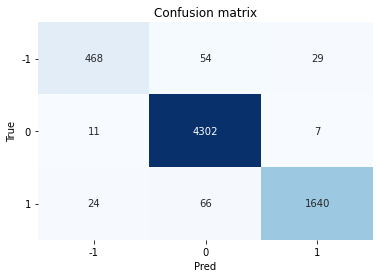

In [54]:
from sklearn import metrics
classes = np.unique(y_testtfidf)
cm0 = metrics.confusion_matrix(y_testtfidf, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [55]:
from sklearn.naive_bayes import MultinomialNB
classifier10 = MultinomialNB()
classifier10.fit(x_traintfidf1, y_traintfidf1)
pred_test = classifier10.predict(x_testtfidf)
pred_train=classifier10.predict(x_traintfidf1)
acc_train10=accuracy_score(y_traintfidf1,pred_train)*100
acc_test10 = accuracy_score(y_testtfidf, pred_test) * 100
print('Accuracy of Training data =',acc_train10)
print("Accuracy of Test data =", acc_test10)

C:\Users\krishna\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of Training data = 88.84402572154929
Accuracy of Test data = 72.21633085896076


In [56]:
print(classification_report(y_testtfidf, pred_test))

              precision    recall  f1-score   support

          -1       0.31      0.81      0.45       551
           0       0.98      0.65      0.78      4320
           1       0.66      0.87      0.75      1730

    accuracy                           0.72      6601
   macro avg       0.65      0.78      0.66      6601
weighted avg       0.84      0.72      0.75      6601



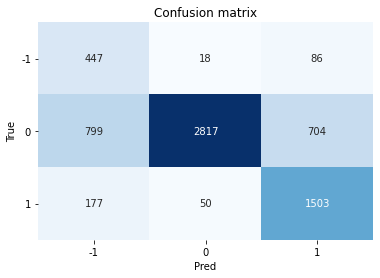

In [57]:
from sklearn import metrics
classes = np.unique(y_testtfidf)
cm0 = metrics.confusion_matrix(y_testtfidf, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [61]:
!pip install rake-nltk

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

resume-parser 0.8.2 requires pdfminer.six>=20200517, but you'll have pdfminer-six 20191110 which is incompatible.



  Attempting uninstall: regex
    Found existing installation: regex 2020.10.15
    Uninstalling regex-2020.10.15:
      Successfully uninstalled regex-2020.10.15
  Attempting uninstall: nltk
    Found existing installation: nltk 3.5
    Uninstalling nltk-3.5:
      Successfully uninstalled nltk-3.5


In [62]:

from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet=WordNetLemmatizer()
from rake_nltk import Rake

In [63]:
def clean_text(a):
    print("Number of words in Review:", len(a.split()))
    text=re.sub('[^A-za-z0-9]',' ',a)
    text=text.lower()
    text=text.split(' ')
    text = [wordnet.lemmatize(word) for word in text if word not in (stopwords.words('english'))]
    text = ' '.join(text)
    
  
    
   
    return text

In [64]:
def expression_check(prediction_input):
    if prediction_input == -1:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print(" Input statement has Neutral Sentiment.")

In [65]:
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor(input):
    input = clean_text(input)
    transformed_input = vectorizer.transform([input])
    prediction = model.predict(transformed_input)
    expression_check(prediction)
    r = Rake(language='english', stopwords=STOPWORDS)
    r.extract_keywords_from_text(input)
    r.get_ranked_phrases()
    print(r.get_ranked_phrases())

In [66]:
a=('After another day to hit new life time high, stocks like.' )

In [67]:
sentiment_predictor(a)

Number of words in Review: 11
Input statement has Positive Sentiment.
['another day hit new life time high stock']
